In [2]:
# Import the required modules
import cv2
import PIL.Image
from io import BytesIO
import IPython.display

In [3]:
#Use 'jpeg' instead of 'png' (~5 times faster)
def showarray(a, prev_display_id=None, fmt='jpeg'):
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    obj = IPython.display.Image(data=f.getvalue())
    if prev_display_id is not None:
        IPython.display.update_display(obj, display_id=prev_display_id)
        return prev_display_id
    else:
        return IPython.display.display(obj, display_id=True)

In [4]:
backSub = cv2.createBackgroundSubtractorKNN(history=500, dist2Threshold=400, detectShadows=True)
#backSub = cv2.createBackgroundSubtractorMOG2(history=100, dist2Threshold=400, detectShadows=false)

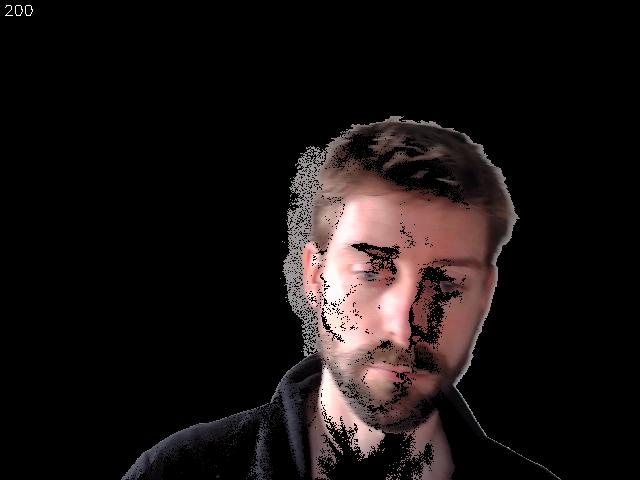

In [5]:
# Read the image and decode to a tensor
vc = cv2.VideoCapture(0)

display_id = None

if vc.isOpened(): # try to get the first frame
    try:
        for i in range(200):
            _, frame = vc.read()

            fgMask = backSub.apply(frame)
            
            # Convert the image from OpenCV BGR format to matplotlib RGB format
            # to display the image
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)        
            
            result = cv2.bitwise_and(frame_rgb, frame_rgb, mask = fgMask)
            cv2.putText(result, str(i+1), (3, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (255, 255, 255), 1)
            
            if display_id is not None:
                showarray(result, display_id)
            else:
                display_id = showarray(result).display_id
                
            # Display the frame info until new frame is available
            IPython.display.clear_output(wait=True)                
                
    finally:
        vc.release()
else:
    is_capturing = False
    print("Camera not found!")